(1797, 64)
(1797, 8, 8)


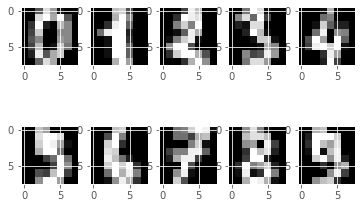

In [63]:
from sklearn import datasets
import matplotlib.pyplot as plt
# %matplotlib
import pandas as pd

digits = datasets.load_digits()

print(digits.data.shape)
print(digits.images.shape)

for image_index in range(10):
    subplot_index = image_index + 1
    plt.subplot(2, 5, subplot_index)
    plt.imshow(digits.images[image_index, :, :], cmap='gray')

## 分类评估指标

In [2]:
import numpy as np
np.random.seed(1234)

from sklearn import metrics

In [31]:
n_smaples = 50
y_true = np.random.randint(0, 2, size=n_smaples)
y_pred = np.ones(n_smaples, dtype=np.int32)

In [32]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1])

In [33]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [34]:
np.sum(y_true == y_pred) / len(y_true)

0.44

In [35]:
metrics.accuracy_score(y_true, y_pred)

0.44

In [36]:
y_true == 1

array([False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
       False,  True, False, False,  True])

In [37]:
y_pred == 1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [38]:
true_a_positive = (y_true == 1)
pred_a_true_positive = (y_pred == 1)

true_a_positive * pred_a_true_positive
# true_a_positive & pred_a_true_positive # 等价

array([False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
       False,  True, False, False,  True])

In [39]:
# TP--True Positive 实际为正样本，预测也为正样本
true_positive = np.sum((y_true == 1) * (y_pred == 1))
true_positive

22

In [40]:
# TN--True Negative 实际为负样本，预测也为负样本
true_negative = np.sum((y_true == 0) * (y_pred == 0))
true_negative

0

In [41]:
# FP--False Positive 实际为负样本，预测为正样本
false_positive = np.sum((y_true == 0) * (y_pred == 1))
false_positive

28

In [42]:
# FN--False Negative 实际为正样本，预测为负样本
false_negative = np.sum((y_true == 1) * (y_pred == 0))
false_negative

0

In [44]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy = (true_positive + true_negative) / len(y_true)
accuracy

0.44

In [45]:
# Precision = TP / (TP + FP) 所有被分为正样本的样本中实际上为正样本的比例
precision = true_positive / (true_positive + false_positive)
precision

0.44

In [47]:
# Recall = TP / (TP + FN) 所有正样本中，被正确划分为正样本的比例
recall = true_positive / (true_positive + false_negative)
recall

1.0

In [50]:
metrics.accuracy_score(y_true, y_pred)

0.44

In [48]:
metrics.precision_score(y_true, y_pred)

0.44

In [49]:
metrics.recall_score(y_true, y_pred)

1.0

## 回归评估指标

In [52]:
# fake data
x = np.linspace(0, 10, 100)
# 在目标值y_true上添加噪声，通过rand函数实现，生成[0,1]内的噪声，通过减去0.5，让噪声以零为中心
y_true = np.sin(x) + np.random.rand(x.size) - 0.5

y_pred = np.sin(x)

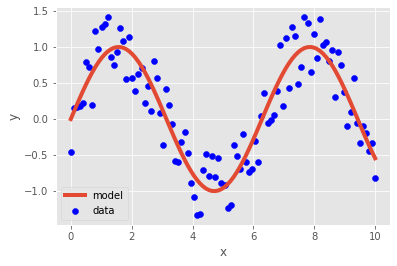

In [55]:
plt.style.use('ggplot')

plt.plot(x, y_pred, linewidth=4, label='model')
plt.scatter(x, y_true, marker='o', color='blue', label = 'data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

### MSE

In [56]:
# MSE -- 均方误差
mse = np.mean((y_true - y_pred)** 2)
mse

0.09231617359442593

In [57]:
metrics.mean_squared_error(y_true, y_pred)

0.09231617359442593

### 可解释方差
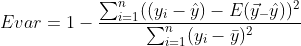

In [58]:
# Evar
evar = 1 - np.var(y_true - y_pred) / np.var(y_true)
evar

0.8274237164600454

In [59]:
metrics.explained_variance_score(y_true, y_pred)

0.8274237164600454

### 决定系数：$R^2$
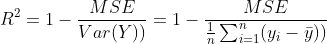

决定系数越接近1，预测值越接近真实样本。$R^2 = 1$，即分子为 0 ，意味着样本中预测值和真实值完全相等，没有任何误差。即模型完美拟合了所有真实数据。

In [60]:
r2 = 1.0 - mse / np.var(y_true)
r2

0.8273721541790477

In [61]:
metrics.r2_score(y_true, y_pred)

0.8273721541790477

## Iris Dataset

In [151]:
from sklearn.datasets import load_iris
data = load_iris()
# 标签（3类）
iris_target = data.target
# 数据集
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names)
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [75]:
iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [77]:
iris_features.head().append(iris_features.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [93]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [152]:
pd.Series(iris_target).value_counts()

2    50
1    50
0    50
dtype: int64

In [154]:
dicts = {}

item = np.unique(iris_target)

for j in item:
    dicts[j] = 0
    for i in iris_target:
        if i == j:
            dicts[j] += 1
dicts

{0: 50, 1: 50, 2: 50}

In [153]:
# 浅拷贝，防止在原始数据上修改
iris_all = iris_features.copy()
iris_all['target'] = iris_target

<Figure size 2700x1800 with 0 Axes>

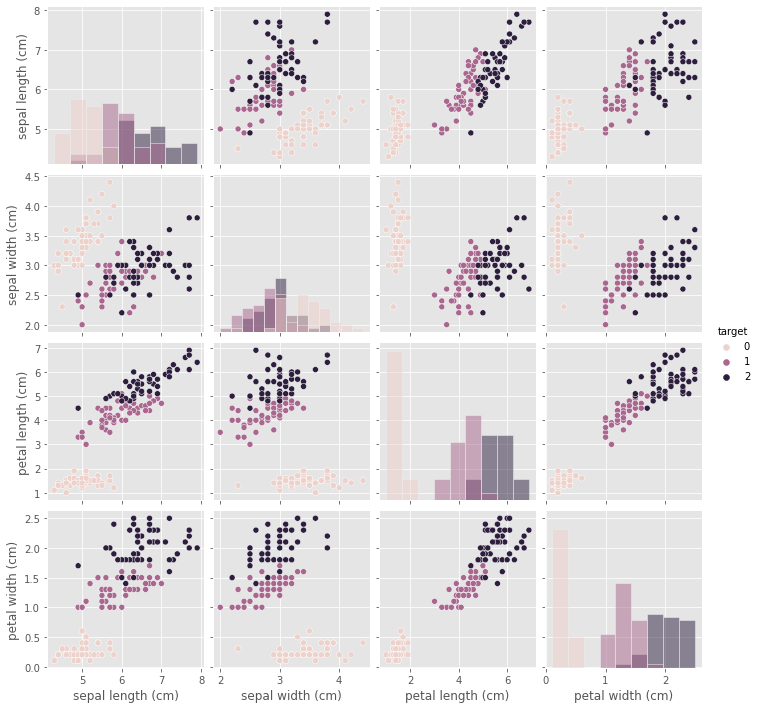

In [156]:
import seaborn as sns

plt.figure(figsize=(9,6), dpi=300)
# 特征与标签组合的散点可视化
sns.pairplot(data=iris_all, diag_kind='hist', hue='target')
plt.show()

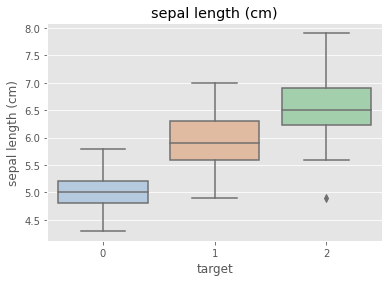

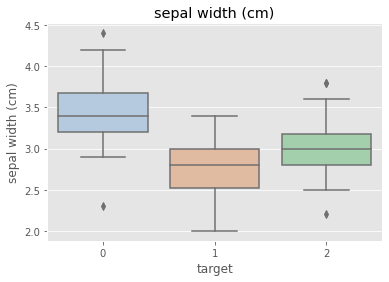

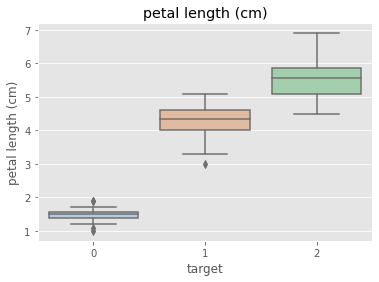

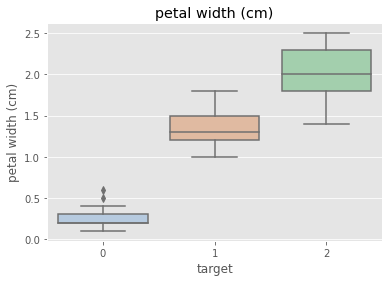

In [157]:
for col in iris_features.columns:
    sns.boxplot(x='target', y=col, saturation=0.5, palette='pastel', data=iris_all)
    plt.title(col)
    plt.show()

利用箱型图也可以得到不同类别在不同特征上的分布差异情况。

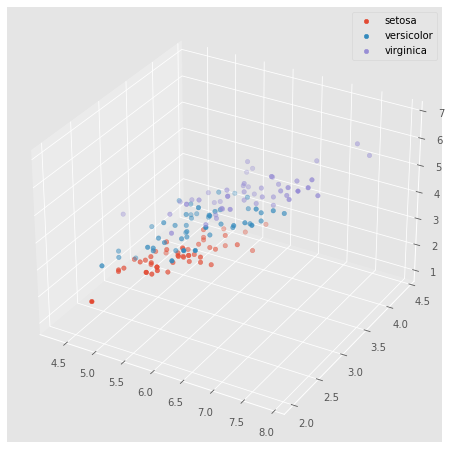

In [158]:
# 选取其前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

iris_all_class0 = iris_all[iris_all['target']==0].values
iris_all_class1 = iris_all[iris_all['target']==1].values
iris_all_class2 = iris_all[iris_all['target']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(iris_all_class0[:,0], iris_all_class0[:,1], iris_all_class0[:,2],label='setosa')
ax.scatter(iris_all_class1[:,0], iris_all_class1[:,1], iris_all_class1[:,2],label='versicolor')
ax.scatter(iris_all_class2[:,0], iris_all_class2[:,1], iris_all_class2[:,2],label='virginica')
plt.legend()

plt.show()

**可以发现，在2D情况下不同的特征组合对于不同类别花的散点分布，以及大概的区分能力。**

## KNN

k-近邻算法步骤如下：
1. 计算已知类别数据集中的点与当前点之间的距离；
2. 按照距离递增次序排序；
3. 选取与当前点距离最小的k个点；
4. 确定前k个点所在类别的出现频率；
5. 返回前k个点所出现频率最高的类别作为当前点的预测分类。

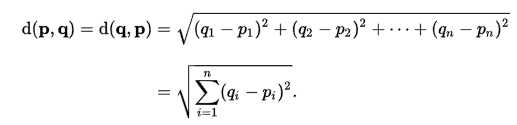
欧氏距离公式

---
优点：

- 简单好用，容易理解，精度高，理论成熟，既可以用来做分类也可以用来做回归；
- 可用于数值型数据和离散型数据；
- 训练时间复杂度为O(n)；无数据输入假定；
- 对异常值不敏感

---
缺点：

- 计算复杂性高；空间复杂性高；
- 样本不平衡问题（即有些类别的样本数量很多，而其它样本的数量很少）；
- 一般数值很大的时候不用这个，计算量太大。但是单个样本又不能太少，否则容易发生误分。
- 最大的缺点是无法给出数据的内在含义。

---
> ref:https://cuijiahua.com/blog/2017/11/ml_1_knn.html

In [195]:
def knn_classify(train_x, test_x, train_y, k):
    """
    Params:
        train_x:training dataset,ndarry
        test_x:test dataset,ndarry
        train_y:training label,ndarry
        k:knn key paramters,int
    """
    # 训练集的行数
    train_rows = train_x.shape[0]
    
    ## 求欧氏距离
    # 在列向量方向上重复test_x共1次（横向），行向量方向上重复test_x共train_x次（纵向）
    # 即将单个测试样本test_x重复复制（二维数组中按照行沿列堆叠），最后的diff_matrix的shape与训练集相同
    # 每个测试样本的不同特征值与训练集中的样本的特征值对应相减
    # np.tile(A, reps):Construct an array by repeating A the number of times given by reps
    diff_matrix = np.tile(test_x, (train_rows, 1)) - train_x
    
    # 二维特征相减后，取平方
    sq_diff_matrix = diff_matrix ** 2
    
    # sum()所有元素相加，sum(0)列相加，sum(1)行相加；次数表示特征之间的距离和
    sq_distances = sq_diff_matrix.sum(axis=1)
    
    # 开方，完成欧氏距离的运算，此时训练集中的所有样本与测试样本的距离均保存在distances中
    distances = sq_distances ** 0.5
    
    # 返回distances中元素从小到大排序后的索引值
    sorted_distance_indices = distances.argsort()
    
    # 定义一个字典，保存类别
    class_count = {}
    
    for i in range(k):
        # 取出前k个元素的类别
        top_k_label = train_y[sorted_distance_indices[i]]
        
        # #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        # 计算类别出现的次数
        class_count[top_k_label] = class_count.get(top_k_label, 0) + 1

        # key 根据字典的值进行排序, reverse降序排序
        sorted_class_count = sorted(class_count.items(), 
                                    key=lambda x:class_count.values(), 
                                    reverse=True)
        
        return sorted_class_count[0][0]

In [220]:
train_x = iris_features
test_x = [[5.6, 2.9, 3.6, 1.3]]
train_rows = train_x.shape[0]
diff_matrix = np.tile(test_x, (train_rows, 1)) - train_x
diff_matrix

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.5,-0.6,2.2,1.1
1,0.7,-0.1,2.2,1.1
2,0.9,-0.3,2.3,1.1
3,1.0,-0.2,2.1,1.1
4,0.6,-0.7,2.2,1.1
...,...,...,...,...
145,-1.1,-0.1,-1.6,-1.0
146,-0.7,0.4,-1.4,-0.6
147,-0.9,-0.1,-1.6,-0.7
148,-0.6,-0.5,-1.8,-1.0


In [171]:
iris_all.values

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [199]:
test_x

[[4.6, 3.1, 1.5, 0.2]]

In [201]:
test_x = [[5.6, 2.9, 3.6, 1.3]]
test_x = [[4.6, 3.1, 1.5, 0.2]]
# 只能单个样本测试
self_knn = knn_classify(train_x=iris_features, test_x=test_x, train_y=iris_target, k=3)

In [209]:
self_knn_pred = []
for test_x in iris_features.values:
    self_knn = knn_classify(train_x=iris_features, test_x=test_x, train_y=iris_target, k=3)
    self_knn_pred.append(self_knn)

knn_true = iris_target
self_knn_pred = np.array(self_knn_pred)
self_knn_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [205]:
np.array(self_knn_pred)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [210]:
metrics.accuracy_score(knn_true, self_knn_pred)

1.0

In [211]:
metrics.recall_score(knn_true, self_knn_pred, average='macro')

1.0

In [212]:
metrics.recall_score(knn_true, self_knn_pred, average='macro')

1.0

## sklearn API
> Ref:https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

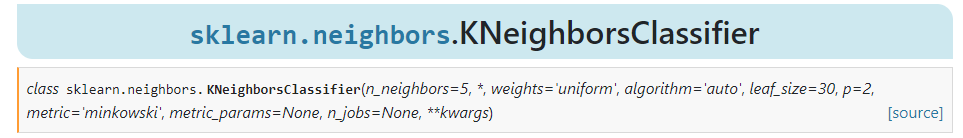

In [173]:
from sklearn.neighbors import KNeighborsClassifier as kNN

In [180]:
knn = kNN(n_neighbors = 3, algorithm = 'auto')
knn.fit(iris_features, iris_target)

KNeighborsClassifier(n_neighbors=3)

In [181]:
knn.predict(test_x)

array([0])

In [184]:
test_x = iris_features
knn_pred = knn.predict(test_x)
knn_true = iris_target

In [185]:
metrics.accuracy_score(knn_true, knn_pred)

0.96

In [188]:
# None, 'micro', 'macro', 'weighted'
metrics.precision_score(knn_true, knn_pred, average='macro')

0.96

In [189]:
metrics.recall_score(knn_true, knn_pred, average='macro')

0.96